In [178]:
from pytube import YouTube

from moviepy.editor import *
import os
from matplotlib import pyplot as plt

from PIL import Image
import numpy as np
from torchvision import transforms

import torch

from warnings import filterwarnings
filterwarnings('ignore')

In [171]:
# Здесь скачиваем видео с youtube и сохраняем в папку
# ссылка на видео с youtube
link = 'https://www.youtube.com/watch?v=OIiER9ZkgN0'
# путь до папки, куда скачиваем видео
save_path = '/Users/Natalia/Documents/учеба/МАИ/Анализ инф. процессов и технологий/Проект/data'

try:
    yt = YouTube(link) 
except:
    print('Ошибка подключения') 

# настраиваем формат видео, выбираем худшее качество для экономии памяти, ускорения работы    
video = yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution')[0]
try:
    video.download(save_path)
    print('Видео загружено в папку', save_path) 
except:
    print('Ошибка загрузки') 

Видео загружено в папку /Users/Natalia/Documents/учеба/МАИ/Анализ инф. процессов и технологий/Проект/data


In [172]:
# Здесь достаем скачанное видео из папки. В данном случаем у нас 1 видео
videos = []

for root, dirs, files in os.walk(save_path):
    for file in files:
        if os.path.splitext(file)[1] == '.mp4':
            # объединяем в полный путь
            filePath = os.path.join(root, file)
            # загружаем видео
            video = VideoFileClip(filePath)
            videos.append(video)
            
final_clip = concatenate_videoclips(videos)

In [200]:
#streamlit run 'Баданина, Зинченко 111 гр. ЛР. Сегментация объектов.ipynb'

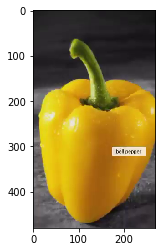

In [197]:
# получаем кадр на n секунде
n = 15
frame = final_clip.get_frame(n)
# рисуем кадр
fig, ax = plt.subplots()
ax.imshow(frame, interpolation ='nearest')
plt.show()
# st.pyplot(fig)

In [182]:
# ОБЯЗАТЕЛЬНО запустить, но можно только 1 раз
# загружаем предобученную модель
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# model.eval()

In [166]:
input_image = frame
# конвертируем массив numpy в PIL
input_image = Image.fromarray(np.uint8(input_image)).convert('RGB')

In [179]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)

In [180]:
#Download ImageNet labels
# тут нужно самому скачать файл и положить туда же, где и жупитер ноутбук лежит
#https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [181]:
with open('imagenet_classes.txt', "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

bell pepper 0.999666690826416
Granny Smith 3.331848347443156e-05
ice lolly 2.1877025574212894e-05
lemon 2.0726465663756244e-05
candle 1.843233621912077e-05


In [184]:
def get_class(frame):
    input_image = frame
    input_image = Image.fromarray(np.uint8(input_image)).convert('RGB')
    
    preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    
    with open('imagenet_classes.txt', "r") as f:
        categories = [s.strip() for s in f.readlines()]
    top5_prob, top5_catid = torch.topk(probabilities, 5)
    return categories[top5_catid[0]], top5_prob[0].item()

In [191]:
#!pip install streamlit

In [193]:
import streamlit as st

('broccoli', 0.9998010993003845)


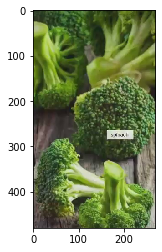

('cauliflower', 0.9990874528884888)


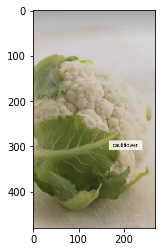

('head cabbage', 0.9734174609184265)


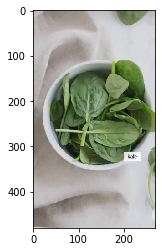

('head cabbage', 0.9841403961181641)


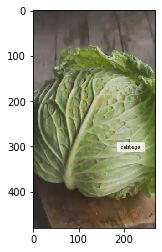

('head cabbage', 0.9230477213859558)


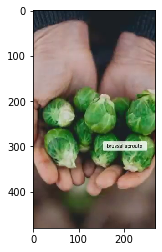

('pomegranate', 0.7878050208091736)


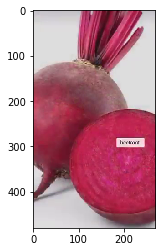

('bell pepper', 0.9970152378082275)


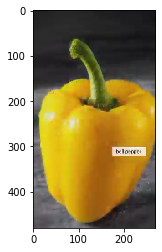

('bell pepper', 0.6019359230995178)


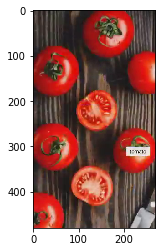

('croquet ball', 0.15715564787387848)


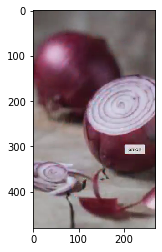

In [189]:
for i in range(2, 20, 2):
    frame = final_clip.get_frame(i)
    # рисуем кадр
    fig, ax = plt.subplots()
    ax.imshow(frame, interpolation ='nearest')
    print(get_class(frame))
    st.pyplot(fig)
#     plt.imshow(frame, interpolation ='nearest')
#     plt.show()

In [ ]:
st.pyplot(fig)